In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityDataToLoad = "Resources/Pyber_city_data.csv"
rideDataToLoad = "Resources/Pyber_ride_data.csv"

# Read the City and Ride Data
cityData = pd.read_csv(cityDataToLoad)
rideData=pd.read_csv(rideDataToLoad)

# Combine the data into a single dataset
cityRideData=pd.merge(cityData,rideData,on='city',how='inner')

# Display the data table for preview

cityRideData.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [10]:
# find avg fare and total rides
groupedCityData = cityRideData.groupby('city')
avgFareEachCity = groupedCityData['fare'].mean().reset_index(name='Average Price')
cityCounts = groupedCityData.size().reset_index(name='Counts')

# Create data sets and merge
cityDriverData = {"City": cityData["city"], "DriverCount": cityData["driver_count"], "Type": cityData["type"]}
cityDriverDataFrame = pd.DataFrame.from_dict(cityDriverData)
avgFareByCity = {"Avg Fare": avgFareEachCity["Average Price"], "City": avgFareEachCity["city"] }
avgFareByCityDataFrame = pd.DataFrame.from_dict(avgFareByCity)
totalRidesByCity = { "Total Rides": cityCounts["Counts"], "City": cityCounts["city"]}
totalRidesByCityDataFrame = pd.DataFrame.from_dict(totalRidesByCity)
combinedDataFrame = pd.merge(avgFareByCityDataFrame, totalRidesByCityDataFrame, on='City')

# Create data frame for scatter plot
scatterPlotDataFrame = pd.merge(combinedDataFrame, cityDriverDataFrame, on='City')


## Bubble Plot of Ride Sharing Data

No handles with labels found to put in legend.


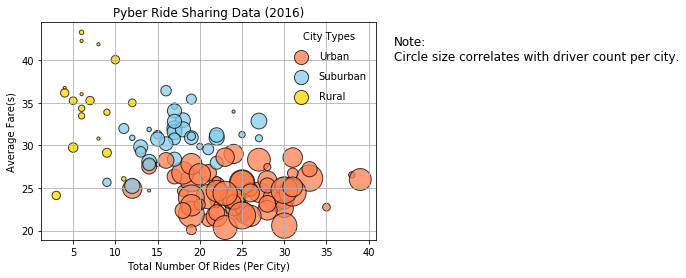

In [11]:
# Obtain the x and y coordinates for each of the three city types
xMax = scatterPlotDataFrame["Total Rides"].max()
xMin = scatterPlotDataFrame["Total Rides"].min()
yMax = scatterPlotDataFrame["Avg Fare"].max()
yMin = scatterPlotDataFrame["Avg Fare"].min()
legendColors = ['Coral', 'SkyBlue', 'Gold']
colorTypes = scatterPlotDataFrame["Type"].map({'Urban': 'Coral', 'Suburban': 'SkyBlue', 'Rural':'Gold'})

# Create the X and Y axis data

x = scatterPlotDataFrame["Total Rides"]
y = scatterPlotDataFrame["Avg Fare"]
size = scatterPlotDataFrame["DriverCount"]

# Build the scatter plots for each city types

fig, bubblePlot = plt.subplots()
plt.legend(frameon=False, labelspacing=1.5, title='City Types')
bubblePlot.scatter(x, y, s=size*10, c=colorTypes, marker="o",label=None, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare(s)")

# Create a legend

pos = 0
for typeOfLocation in ['Urban', 'Suburban', 'Rural']:
   plt.scatter([], [], c=legendColors[pos], alpha=0.75, s=200, marker="o", edgecolors="black",
               label=str(typeOfLocation))
   pos += 1
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Types')
plt.grid(True)

# Incorporate a text label regarding circle size

plt.text(43, 40, 'Note:\nCircle size correlates with driver count per city.', fontsize=12)

# Save Figure
fig.savefig('Images/bubblePlot.png')

## Total Fares by City Type

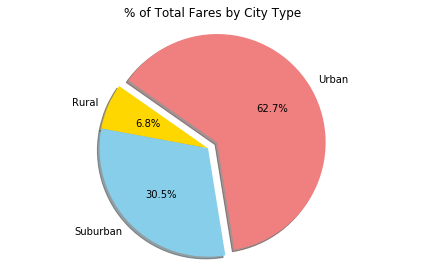

In [12]:
# Calculate Type Percents
GroupedCityTypData=cityRideData.groupby('type')
TotalFare=cityRideData['fare'].sum()
TotalFareByCityType=((GroupedCityTypData['fare'].sum()/TotalFare)*100).reset_index(name='Type Percents')
TotalFaresbyCityType={'City Type':TotalFareByCityType['type'],'Percentage':TotalFareByCityType['Type Percents']}
TotalFareByCityTypeDF= pd.DataFrame.from_dict(TotalFaresbyCityType)

CityType=TotalFareByCityTypeDF['City Type']
Percentage=TotalFareByCityTypeDF['Percentage']
explode = (0,0,0.1)
colors=['Gold','SkyBlue','lightcoral']

# Build Pie Chart

fig, pieChart = plt.subplots()
pieChart.pie(Percentage, explode=explode, labels=CityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145 )
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.tight_layout()
# Save Figure
fig.savefig('Images/cityTypePieChart.png')

## Total Rides by City Type

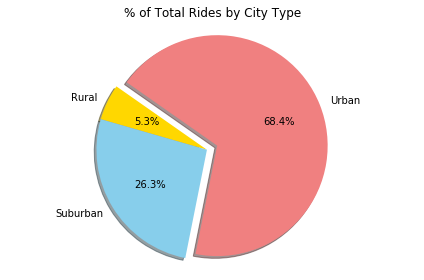

In [13]:
# Calculate Ride Percents
GroupedCityTypData=scatterPlotDataFrame.groupby('Type')
totalRide=scatterPlotDataFrame['Total Rides'].sum()
TotalRidePercentByCityType=((GroupedCityTypData['Total Rides'].sum()/totalRide)*100).reset_index(name='Ride Percents')
TotalRidessbyCityType={'City Type':TotalRidePercentByCityType['Type'],'Percentage':TotalRidePercentByCityType['Ride Percents']}
TotalRidesByCityTypeDF= pd.DataFrame.from_dict(TotalRidessbyCityType)

# Build Pie Chart
Percentage=TotalRidesByCityTypeDF['Percentage']
fig, pieChart = plt.subplots()
pieChart.pie(Percentage, explode=explode, labels=CityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145 )

# Create axes which are equal so we have a perfect circle and set title
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()
# Save Figure
fig.savefig('Images/totalRidesPieChart.png')



## Total Drivers by City Type

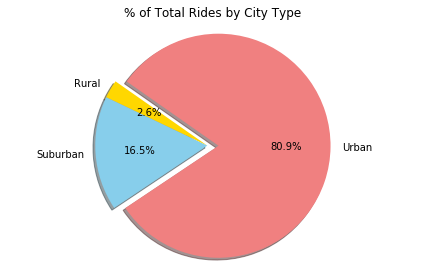

In [14]:
# Calculate Driver Percents
totalDriverCount=scatterPlotDataFrame['DriverCount'].sum()
TotalDriverPercentByCityType=((GroupedCityTypData['DriverCount'].sum()/totalDriverCount)*100).reset_index(name='Driver Percents')
TotalDriversbyCityType={'City Type':TotalDriverPercentByCityType['Type'],'Percentage':TotalDriverPercentByCityType['Driver Percents']}
TotalDriversByCityTypeDF= pd.DataFrame.from_dict(TotalDriversbyCityType)

# Build Pie Charts
Percentage=TotalDriversByCityTypeDF['Percentage']
fig, pieChart = plt.subplots()
pieChart.pie(Percentage, explode=explode, labels=CityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)

# Create axes which are equal so we have a perfect circle and set title
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()
plt.show()

# Save Figure
fig.savefig('totalDriversPieChart.png')
